In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
!wget --directory-prefix=../data/covid -Nq https://raw.githubusercontent.com/ANRGUSC/covid19_risk_estimation/master/data/Covid-19.csv
covid_filename = '../data/covid/Covid-19.csv'

covid_df = pd.read_csv(covid_filename)
covid_unique_regions = pd.DataFrame(data=pd.unique(covid_df.Region),columns=['region'])

covid_df['Time'] = pd.to_datetime(covid_df['Time Stamp'], format='%m-%d-%Y')
del covid_df['Time Stamp']
covid_df = covid_df.sort_values('Time').reset_index()
del covid_df['index']
covid_df.head()

Region   Latitude   Longitude  Number of cases       Time
0        Alhambra  34.093042 -118.127060                2 2020-03-16
1     Westchester  33.959735 -118.400632                1 2020-03-16
2     West Vernon  34.007135 -118.225250                1 2020-03-16
3  West Hollywood  34.092301 -118.369289                5 2020-03-16
4      West Hills  34.203232 -118.645476                3 2020-03-16

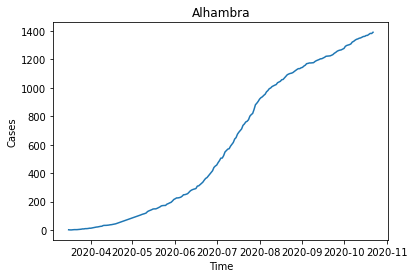

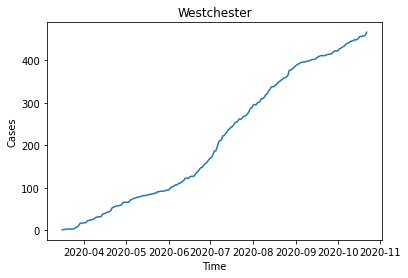

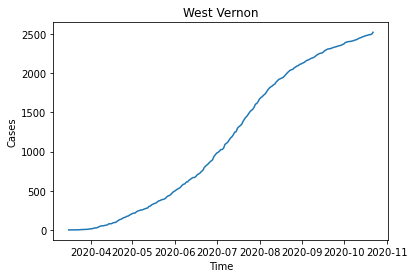

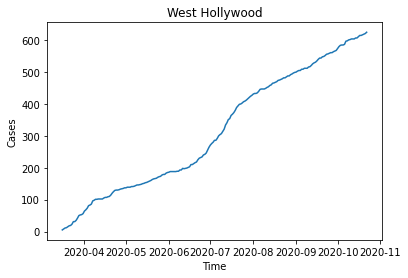

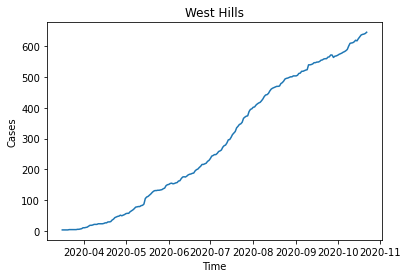

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting the first 5 regions
for region in covid_df["Region"].unique()[:5]:
  df = covid_df[covid_df['Region'] == region]
  times = df['Time']
  cases = df['Number of cases']
  plt.plot(times, cases)
  plt.title(region)
  plt.xlabel("Time")
  plt.ylabel("Cases")
  plt.show()


In [48]:
list_of_wrongs = list()
for region in covid_df["Region"].unique():
  wrong_days = list()
  df = covid_df[covid_df['Region'] == region]
  times = list(df['Time'])
  cases = list(df['Number of cases'])
  idx = 1
  for case in cases[1:]:
    if cases[idx] < cases[idx - 1]:
      wrong_days.append(times[idx])
    idx += 1
  if len(wrong_days) > 0:
    print(wrong_days)
  list_of_wrongs.append(wrong_days)

from collections import Counter
counter = Counter(list_of_wrongs[0])
for i in list_of_wrongs[1:]: 
    counter.update(i)

[Timestamp('2020-03-17 00:00:00'), Timestamp('2020-10-21 00:00:00')]
[Timestamp('2020-06-15 00:00:00'), Timestamp('2020-07-23 00:00:00'), Timestamp('2020-08-03 00:00:00')]
[Timestamp('2020-06-12 00:00:00')]
[Timestamp('2020-04-28 00:00:00'), Timestamp('2020-06-04 00:00:00'), Timestamp('2020-06-13 00:00:00'), Timestamp('2020-09-28 00:00:00'), Timestamp('2020-10-15 00:00:00')]
[Timestamp('2020-03-22 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-10-14 00:00:00'), Timestamp('2020-10-16 00:00:00'), Timestamp('2020-10-20 00:00:00')]
[Timestamp('2020-03-17 00:00:00'), Timestamp('2020-05-22 00:00:00'), Timestamp('2020-06-05 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-10-17 00:00:00')]
[Timestamp('2020-04-18 00:00:00'), Timestamp('2020-08-18 00:00:00'), Timestamp('2020-10-15 00:00:00'), Timestamp('2020-10-18 00:00:00')]
[Timestamp('2020-04-19 00:00:00'), Timestamp('2020-05-17 00:00:00'), Timestamp('2020-05-22 00:00:00'), Timest

# Most common "drops" in Covid Cases by date

In [49]:
counter.most_common()

[(Timestamp('2020-03-27 00:00:00'), 36),
 (Timestamp('2020-09-28 00:00:00'), 27),
 (Timestamp('2020-06-15 00:00:00'), 24),
 (Timestamp('2020-10-17 00:00:00'), 18),
 (Timestamp('2020-10-20 00:00:00'), 14),
 (Timestamp('2020-09-15 00:00:00'), 14),
 (Timestamp('2020-08-25 00:00:00'), 14),
 (Timestamp('2020-10-16 00:00:00'), 13),
 (Timestamp('2020-10-15 00:00:00'), 11),
 (Timestamp('2020-09-01 00:00:00'), 11),
 (Timestamp('2020-10-18 00:00:00'), 11),
 (Timestamp('2020-09-22 00:00:00'), 11),
 (Timestamp('2020-10-14 00:00:00'), 10),
 (Timestamp('2020-06-04 00:00:00'), 9),
 (Timestamp('2020-09-14 00:00:00'), 9),
 (Timestamp('2020-10-05 00:00:00'), 8),
 (Timestamp('2020-07-24 00:00:00'), 8),
 (Timestamp('2020-04-16 00:00:00'), 8),
 (Timestamp('2020-09-24 00:00:00'), 8),
 (Timestamp('2020-05-16 00:00:00'), 7),
 (Timestamp('2020-09-23 00:00:00'), 7),
 (Timestamp('2020-10-10 00:00:00'), 7),
 (Timestamp('2020-06-16 00:00:00'), 7),
 (Timestamp('2020-05-22 00:00:00'), 6),
 (Timestamp('2020-08-18 00:

In [50]:
from tqdm.notebook import tqdm

# Set COVID cases to not be less than previously recorded - it should be a non-decreasing function
for region in tqdm(covid_df["Region"].unique()):
  df = covid_df[covid_df['Region'] == region]
  prev_cases = 0
  for idx, row in df.iterrows():
    if prev_cases > row['Number of cases']:
      covid_df.loc[idx, 'Number of cases'] =  prev_cases
    else:
      prev_cases = row['Number of cases']

# Verify no more drops
list_of_wrongs = list()
for region in covid_df["Region"].unique():
  wrong_days = list()
  df = covid_df[covid_df['Region'] == region]
  times = list(df['Time'])
  cases = list(df['Number of cases'])
  idx = 1
  for case in cases[1:]:
    if cases[idx] < cases[idx - 1]:
      wrong_days.append(times[idx])
    idx += 1
  list_of_wrongs.append(wrong_days)

from collections import Counter
counter = Counter(list_of_wrongs[0])
for i in list_of_wrongs[1:]: 
    counter.update(i)
counter.most_common()

[]

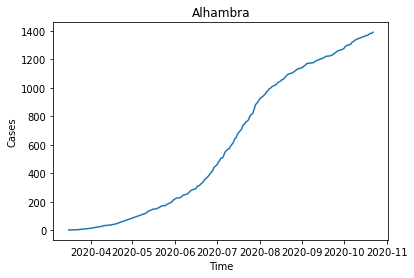

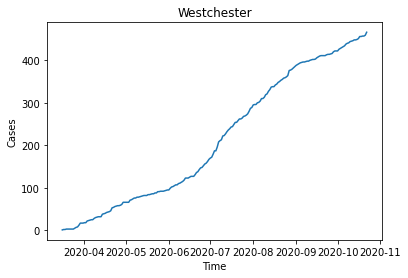

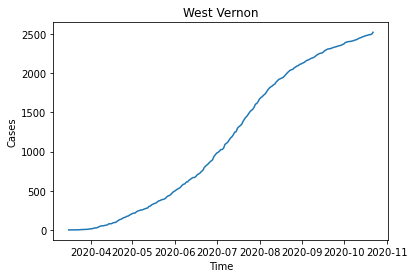

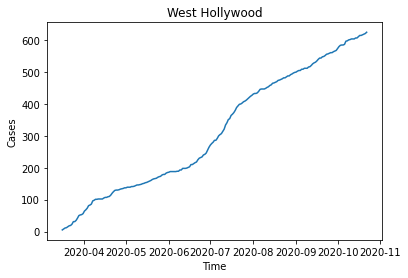

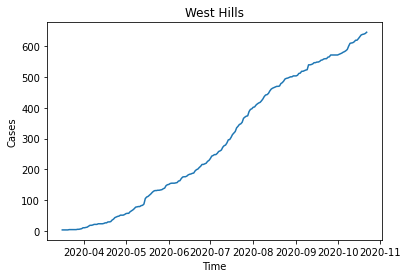

In [51]:
# Just plotting the first 5 to show that this works
for region in covid_df["Region"].unique()[:5]:
  df = covid_df[covid_df['Region'] == region]
  times = df['Time']
  cases = df['Number of cases']
  plt.plot(times, cases)
  plt.title(region)
  plt.xlabel("Time")
  plt.ylabel("Cases")
  plt.show()

# Add relative number of cases (Number of new cases)

In [52]:
for region in tqdm(covid_df["Region"].unique()):
  df = covid_df[covid_df['Region'] == region]
  prev_cases = 0
  for idx, row in df.iterrows():
    covid_df.loc[idx, 'Number of new cases'] =  row['Number of cases'] - prev_cases
    prev_cases = row['Number of cases']
print(covid_df.head())
print(covid_df[covid_df['Region'] == 'Alhambra'])


           Region   Latitude  ...       Time  Number of new cases
0        Alhambra  34.093042  ... 2020-03-16                  2.0
1     Westchester  33.959735  ... 2020-03-16                  1.0
2     West Vernon  34.007135  ... 2020-03-16                  1.0
3  West Hollywood  34.092301  ... 2020-03-16                  5.0
4      West Hills  34.203232  ... 2020-03-16                  3.0

[5 rows x 6 columns]
         Region   Latitude  ...       Time  Number of new cases
0      Alhambra  34.093042  ... 2020-03-16                  2.0
55     Alhambra  34.093042  ... 2020-03-17                  0.0
98     Alhambra  34.093042  ... 2020-03-18                  0.0
166    Alhambra  34.093042  ... 2020-03-19                  0.0
246    Alhambra  34.093042  ... 2020-03-20                  1.0
...         ...        ...  ...        ...                  ...
50174  Alhambra  34.093042  ... 2020-10-18                  1.0
50415  Alhambra  34.093042  ... 2020-10-19                  7.0
50583

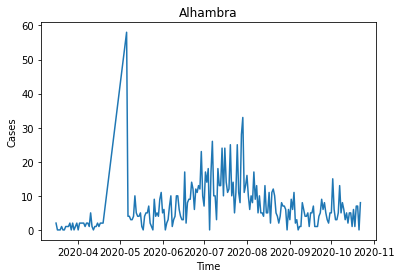

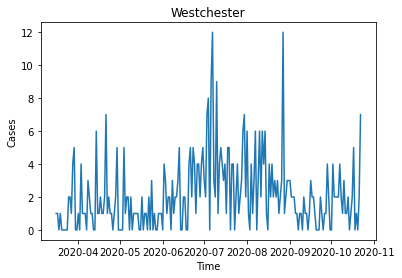

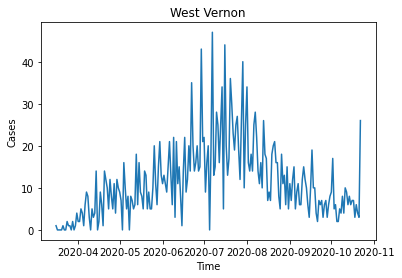

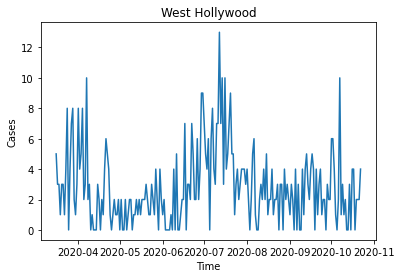

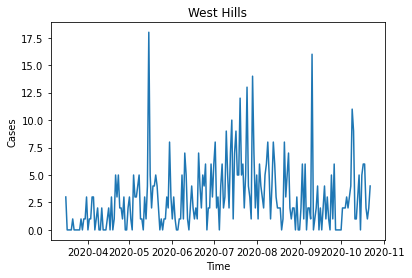

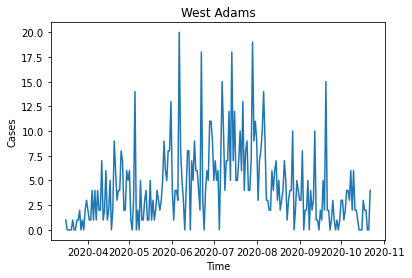

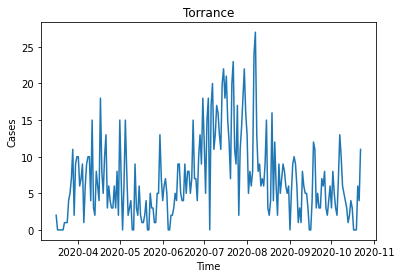

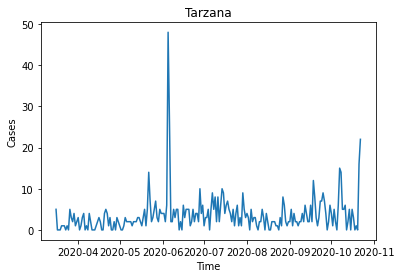

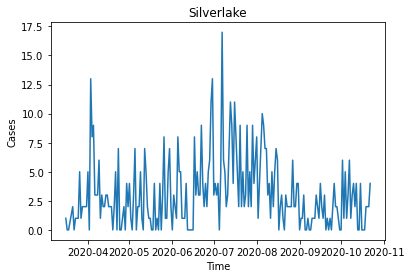

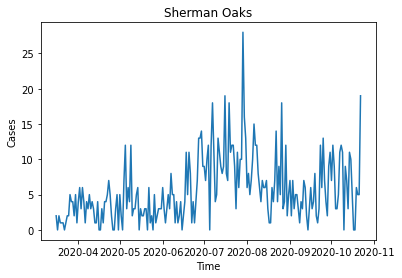

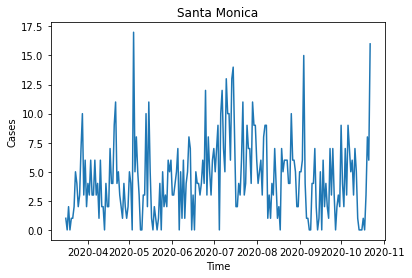

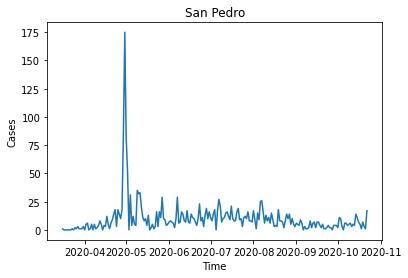

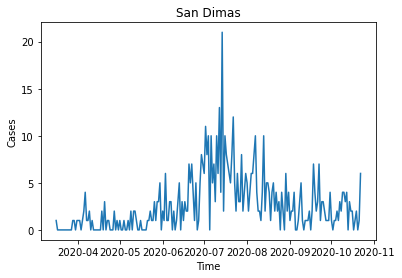

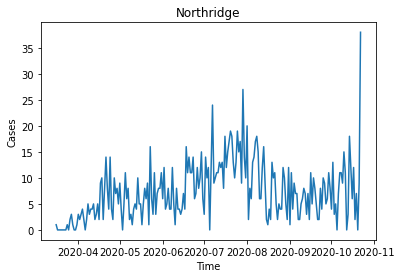

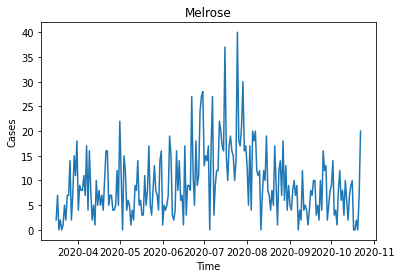

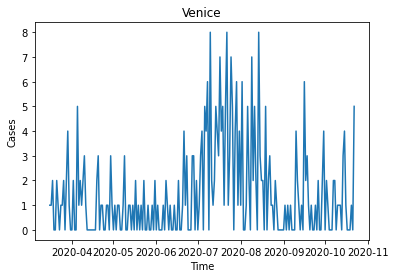

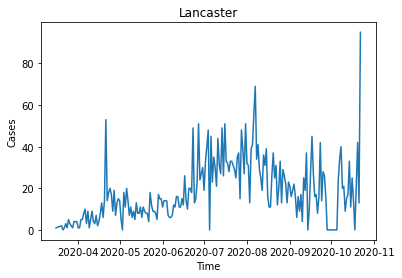

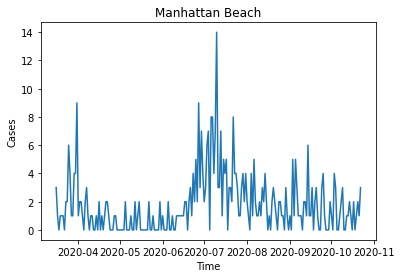

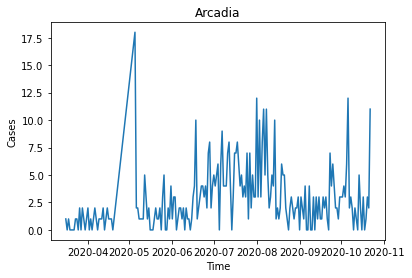

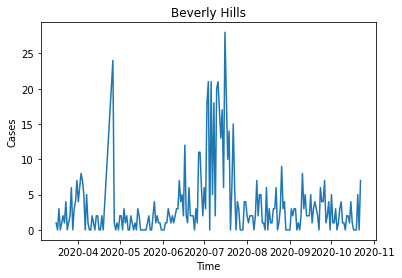

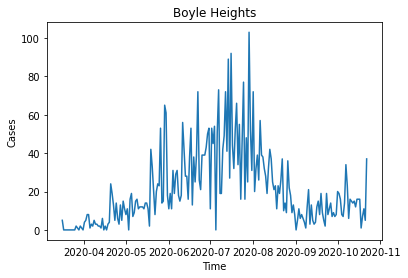

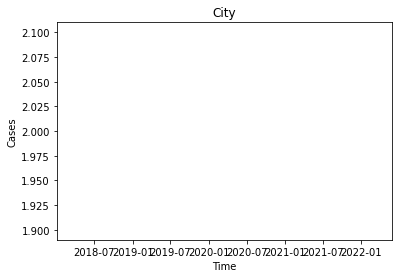

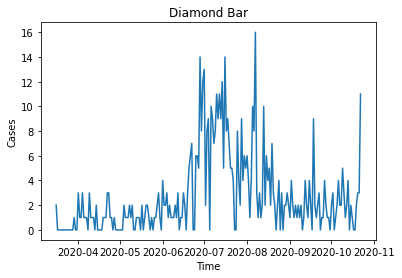

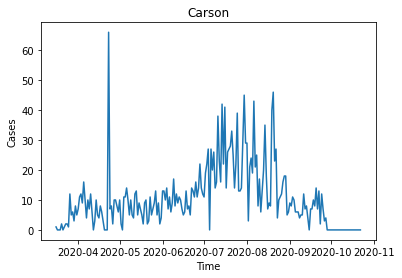

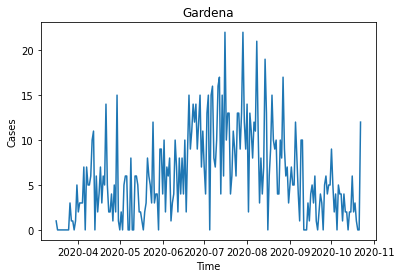

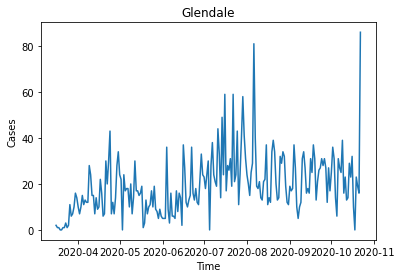

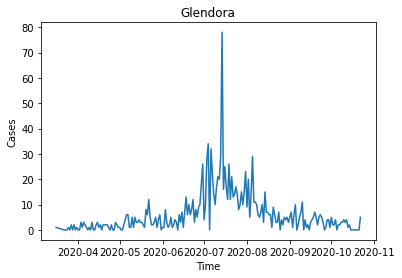

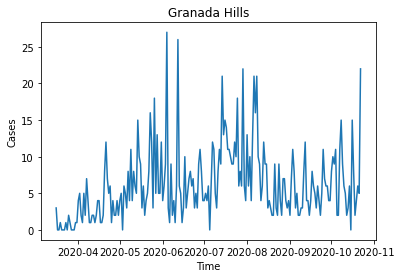

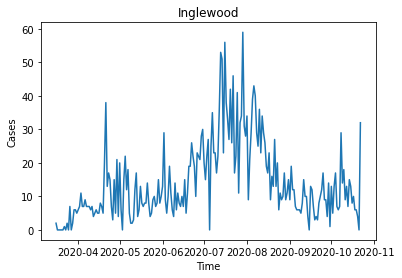

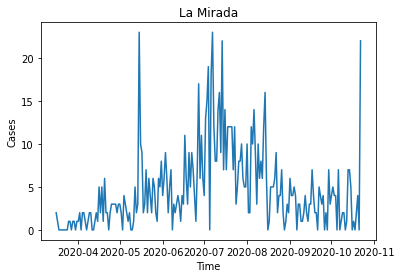

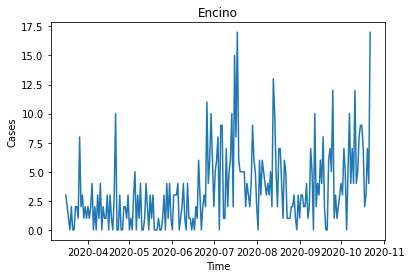

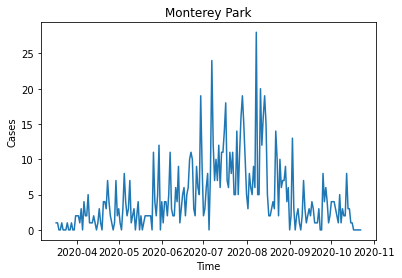

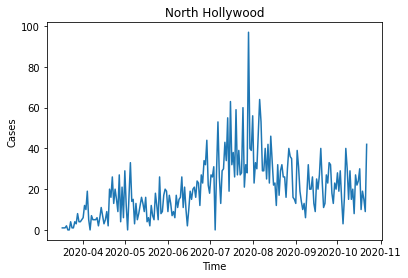

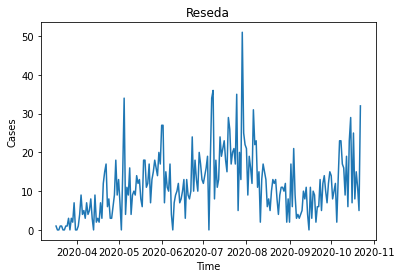

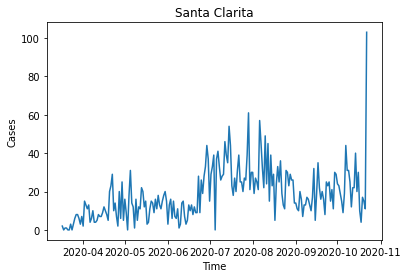

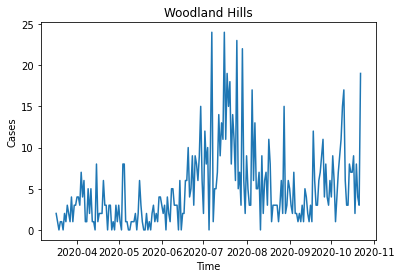

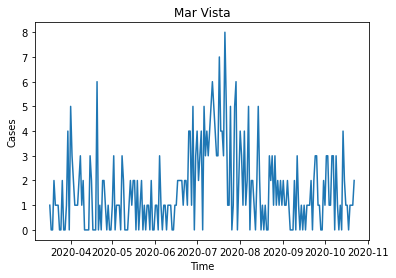

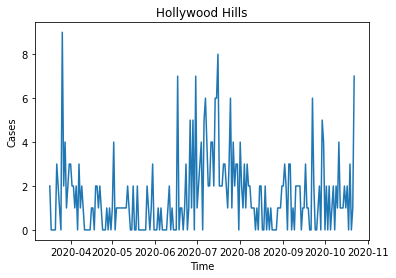

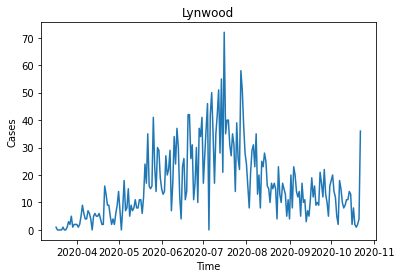

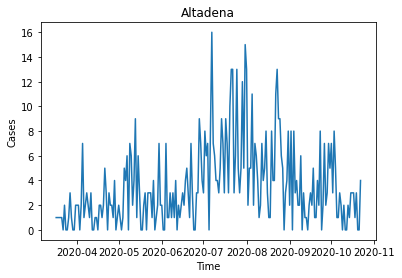

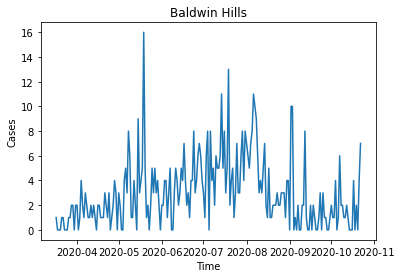

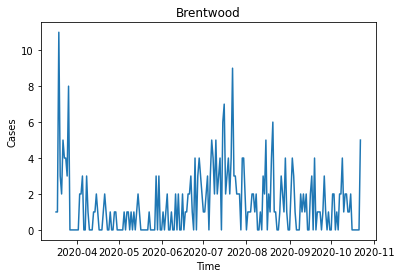

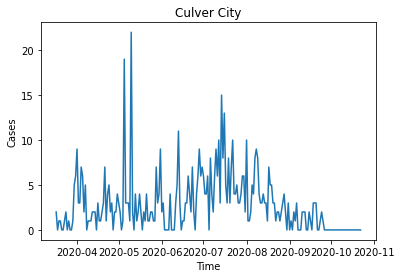

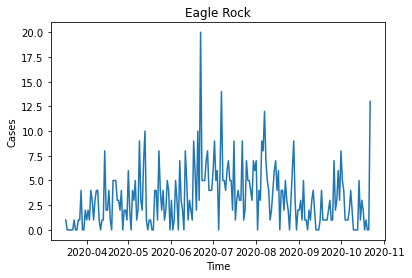

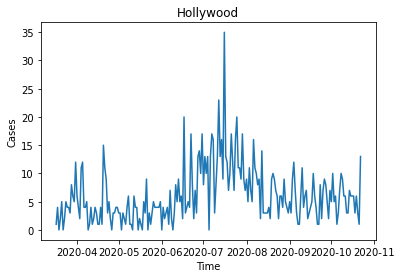

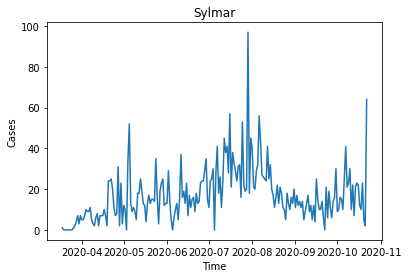

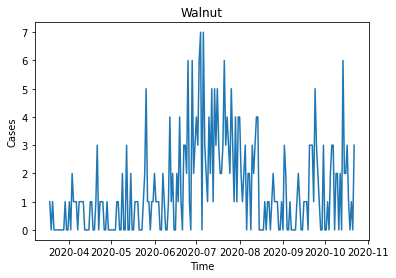

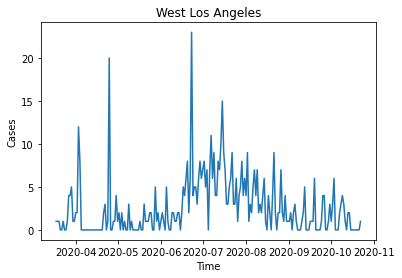

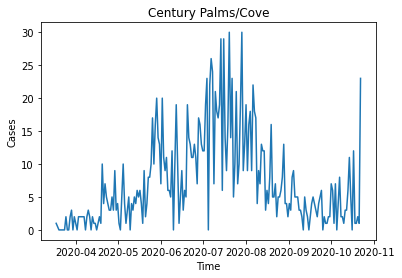

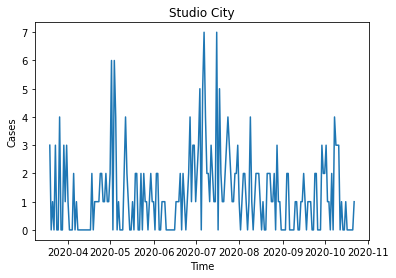

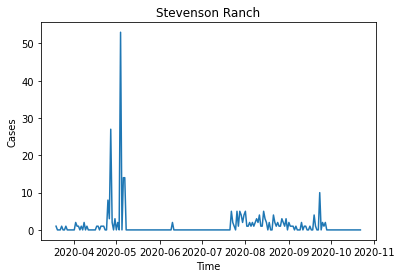

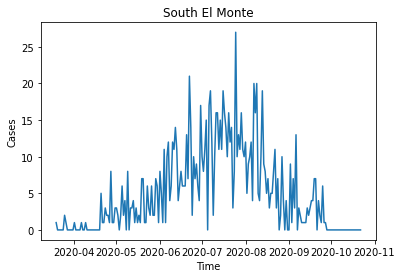

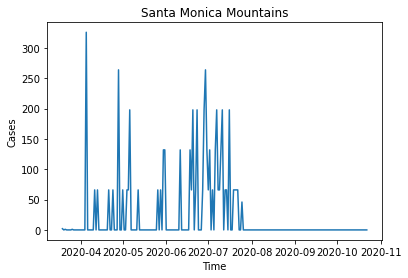

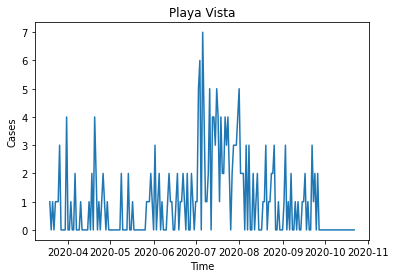

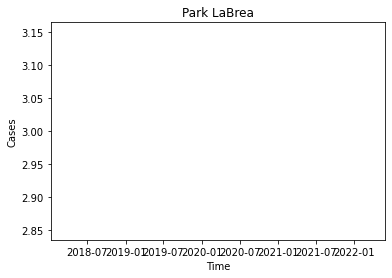

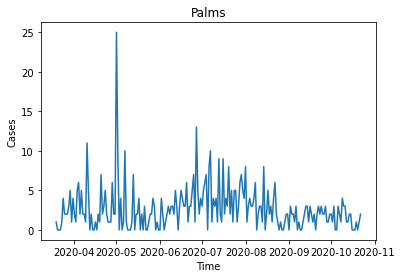

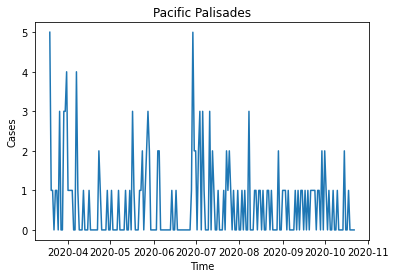

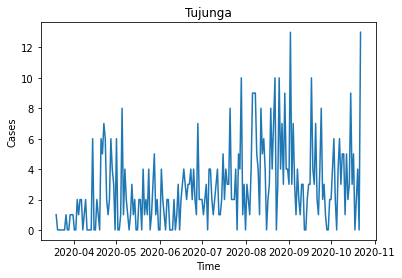

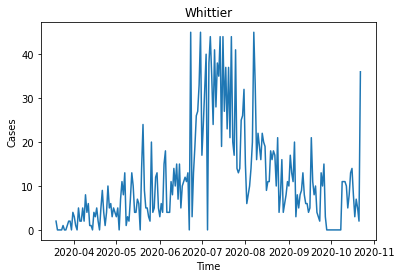

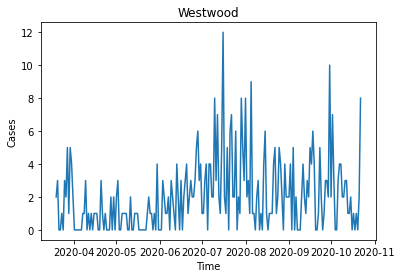

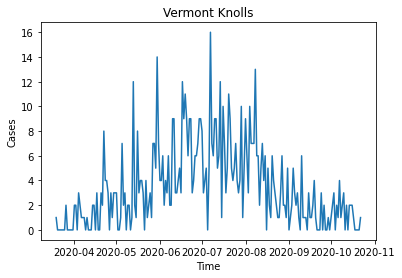

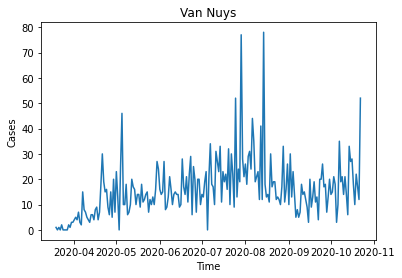

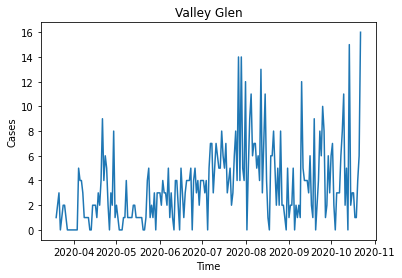

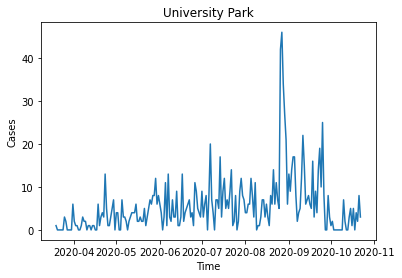

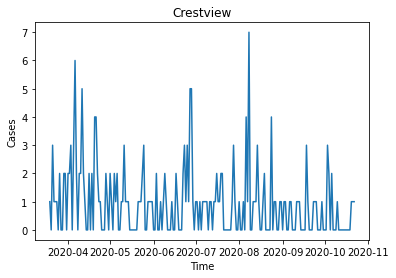

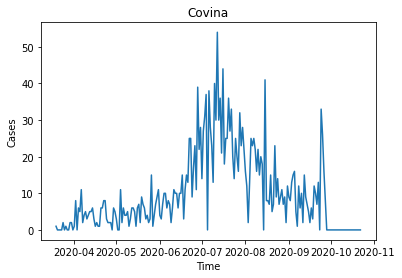

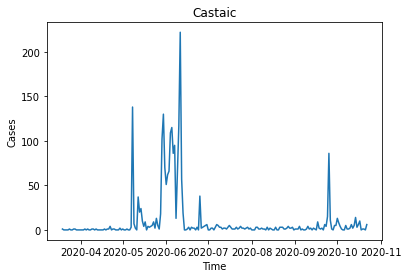

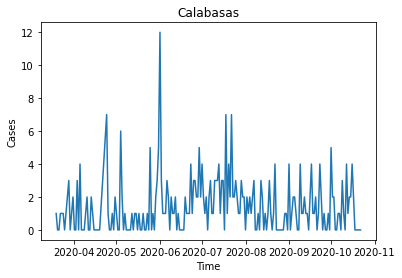

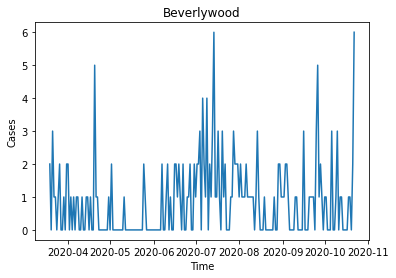

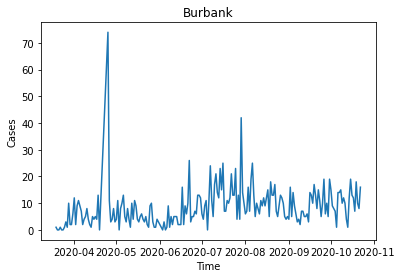

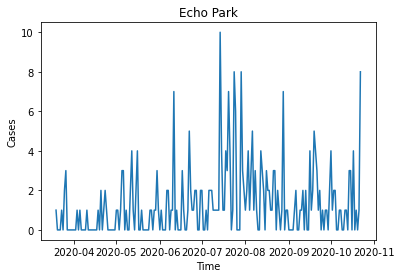

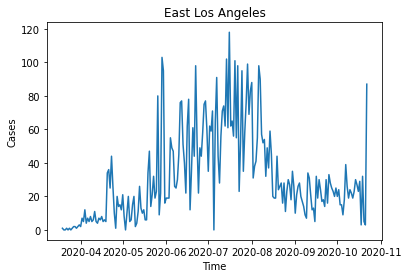

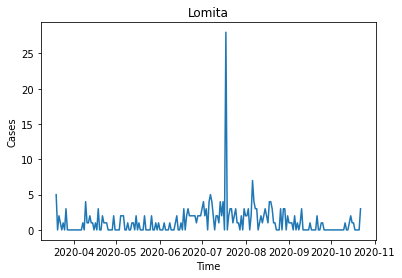

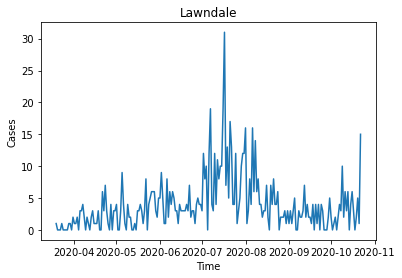

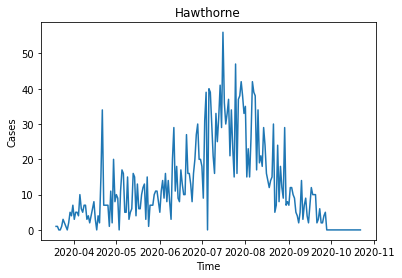

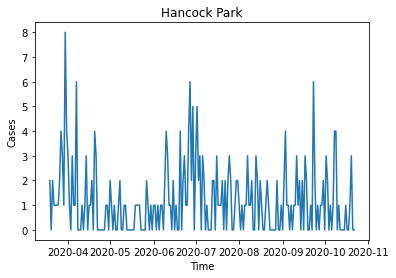

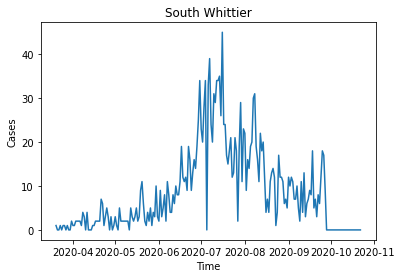

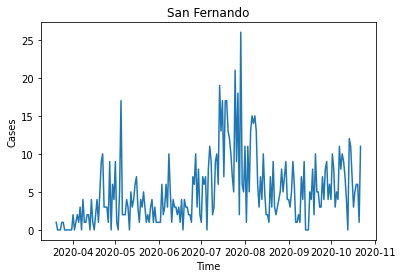

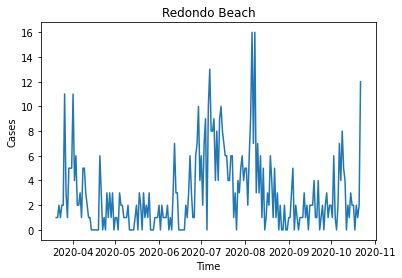

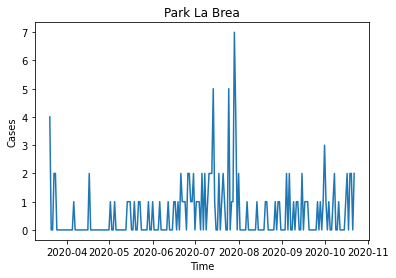

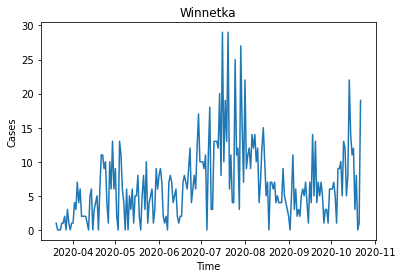

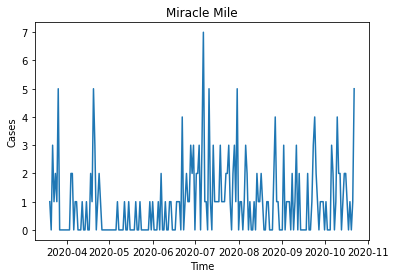

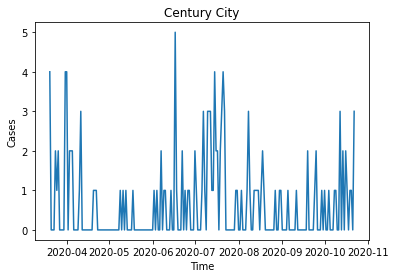

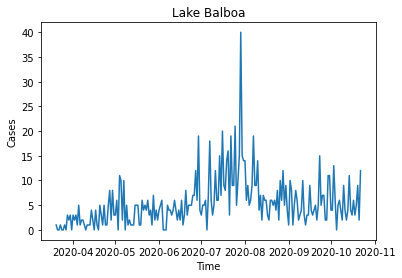

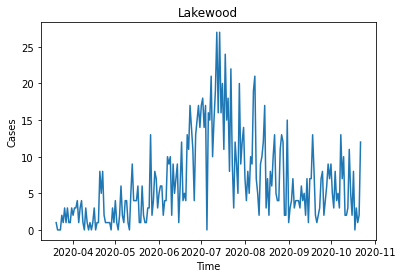

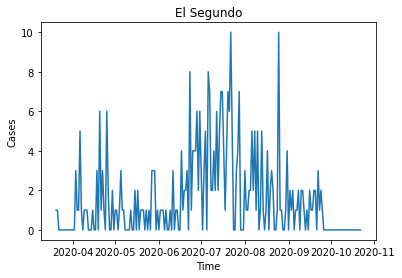

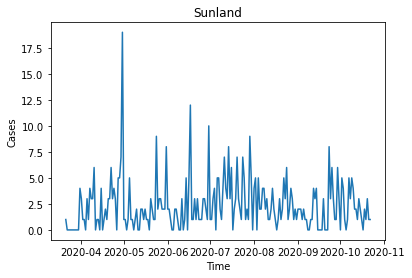

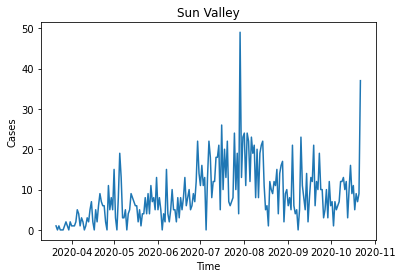

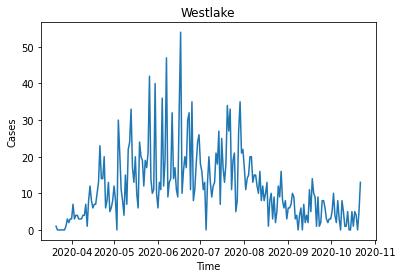

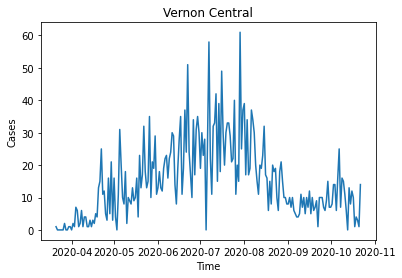

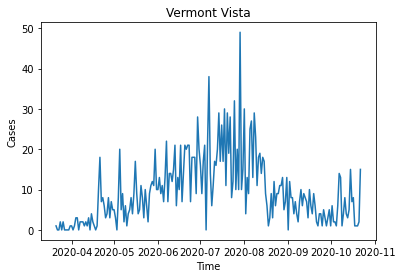

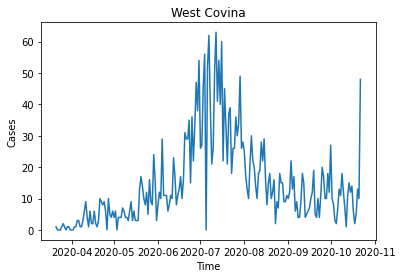

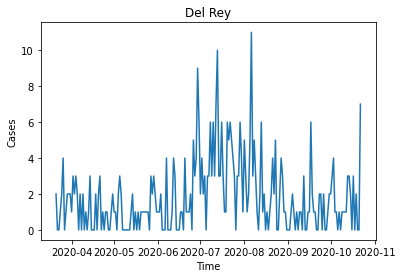

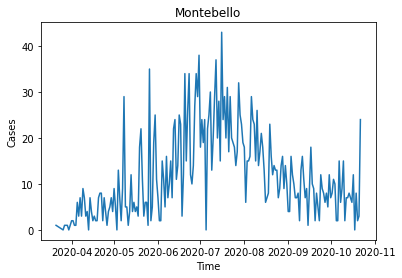

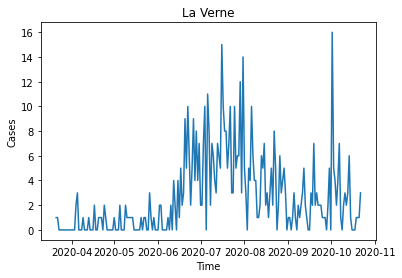

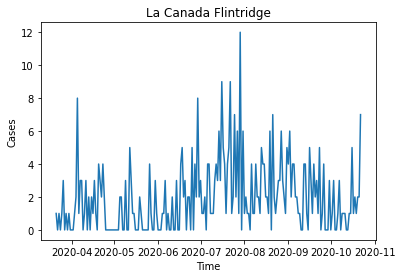

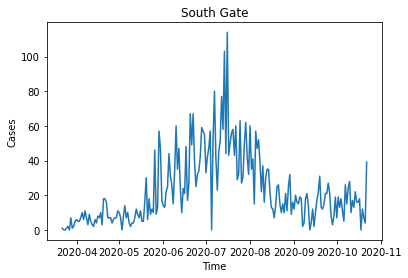

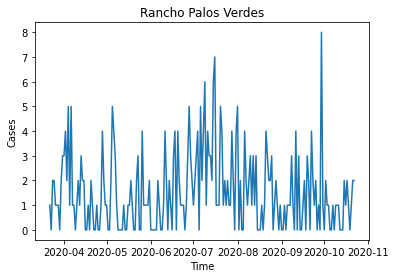

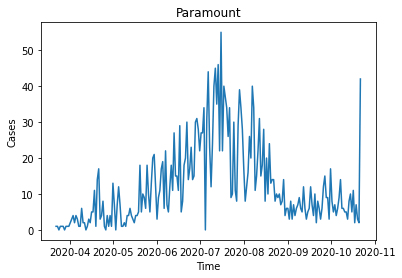

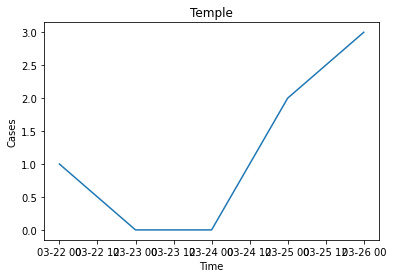

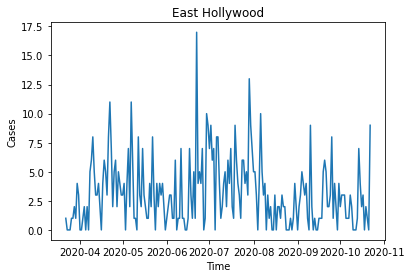

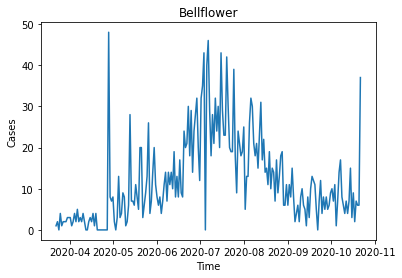

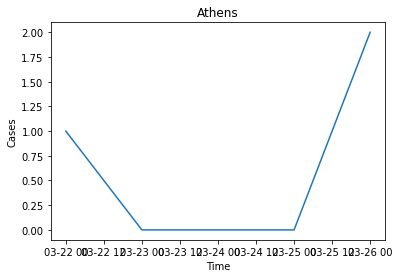

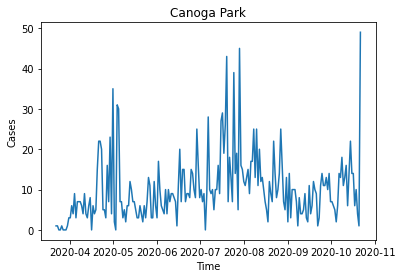

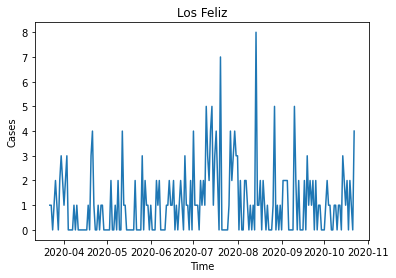

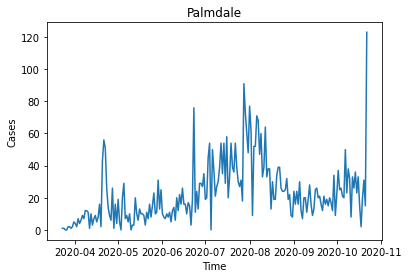

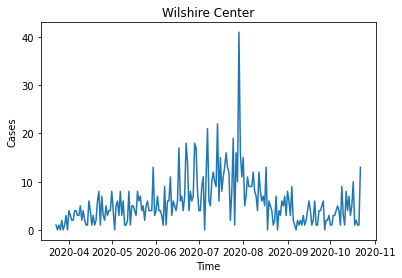

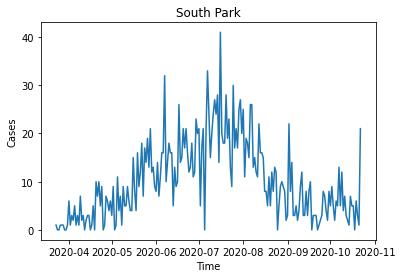

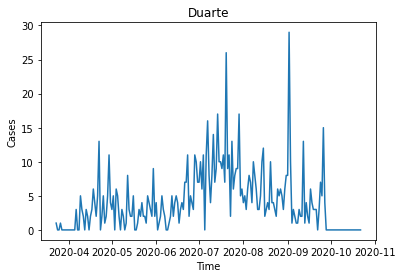

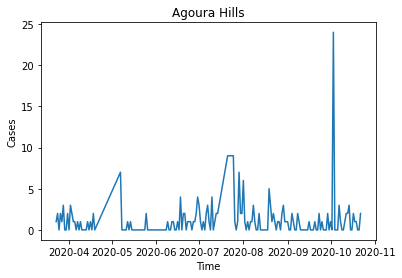

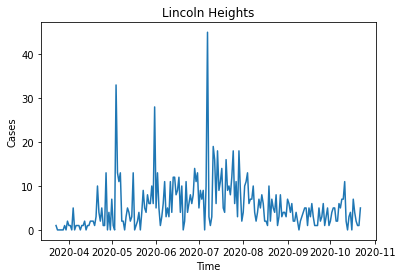

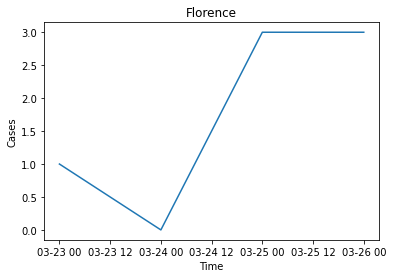

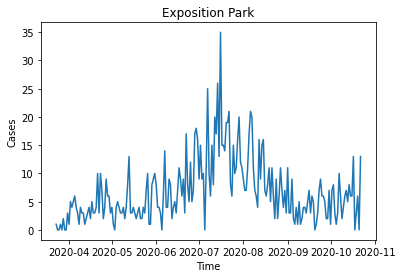

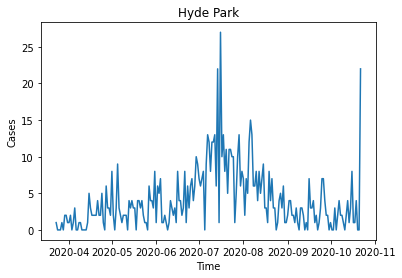

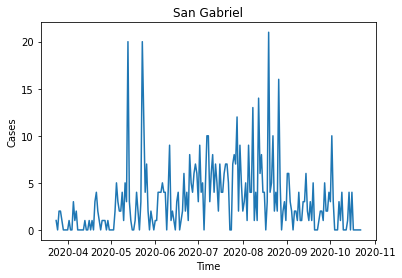

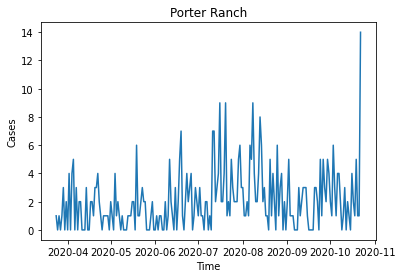

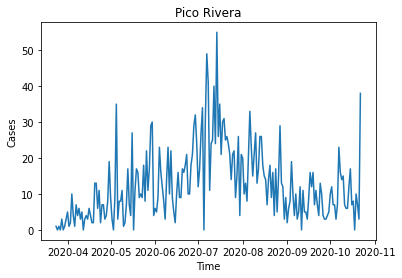

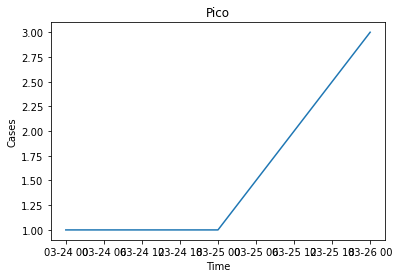

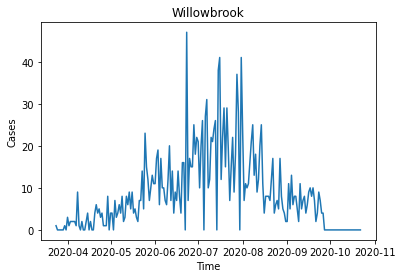

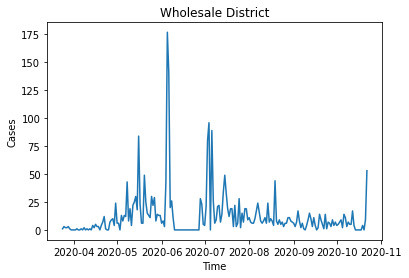

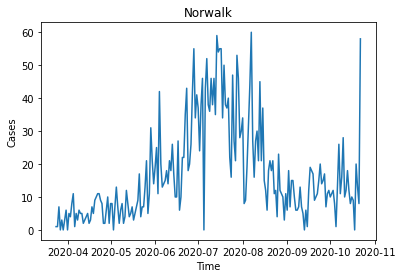

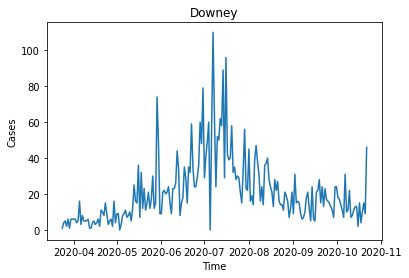

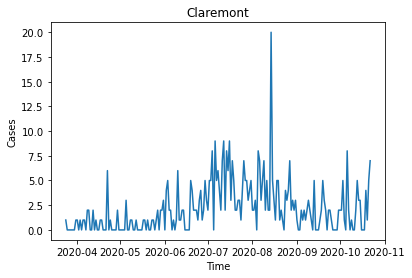

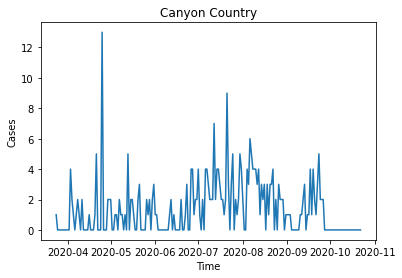

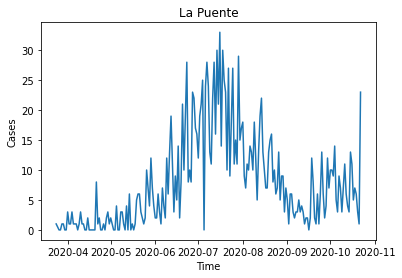

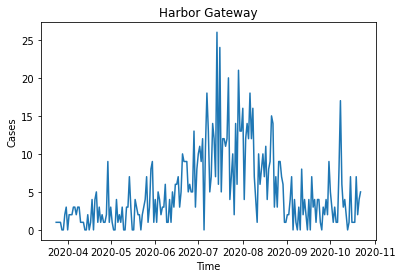

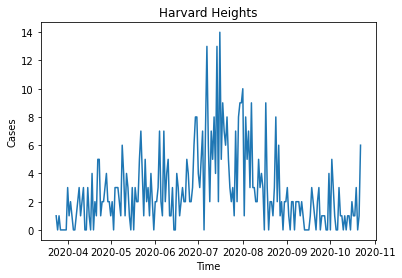

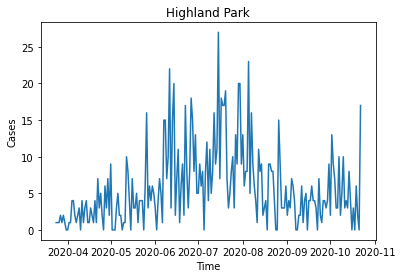

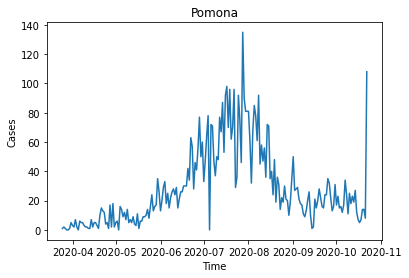

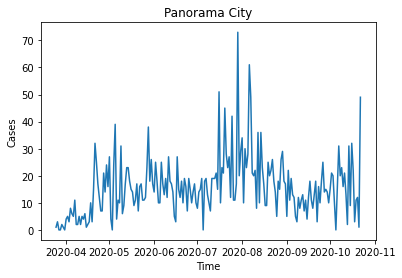

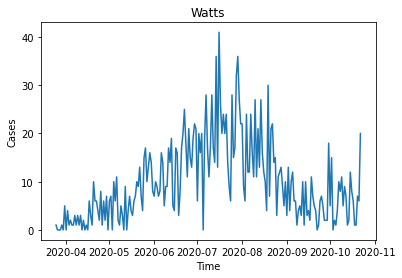

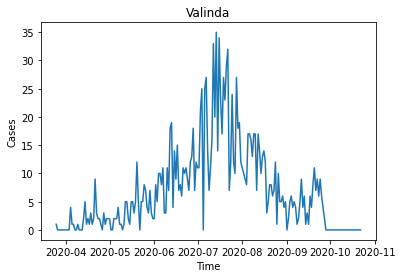

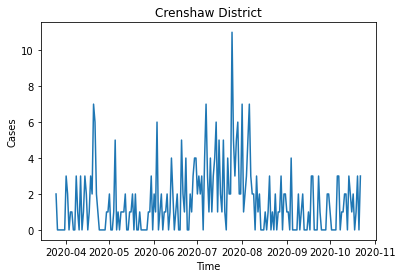

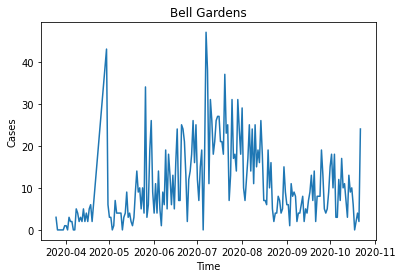

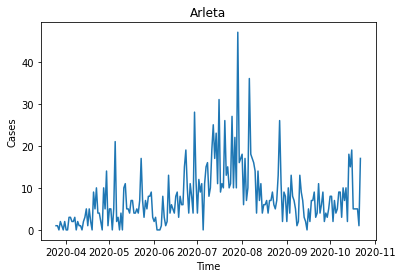

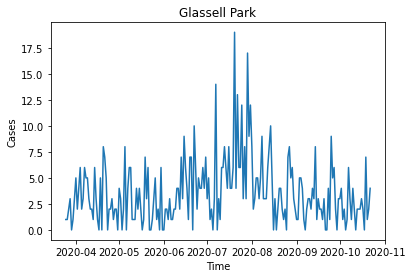

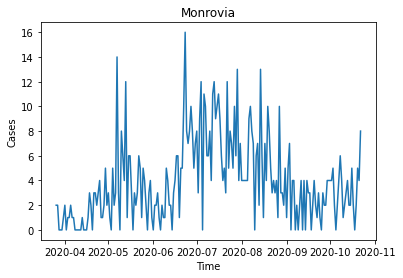

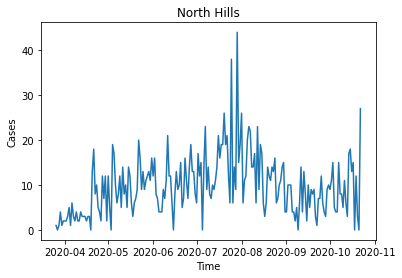

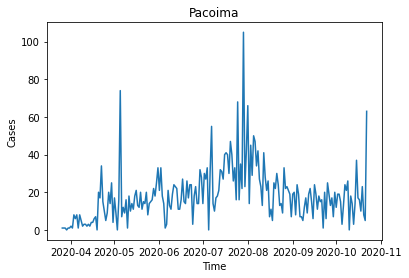

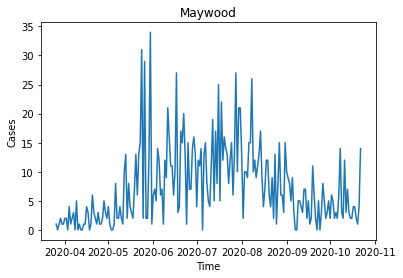

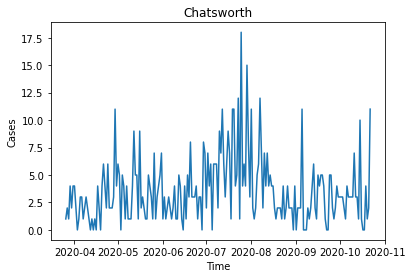

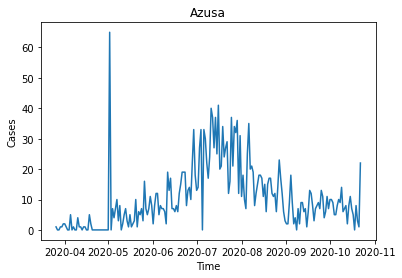

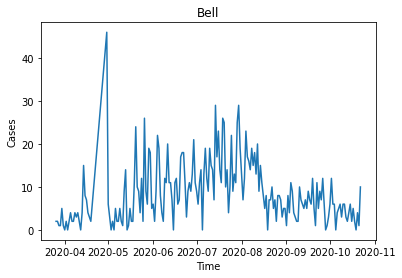

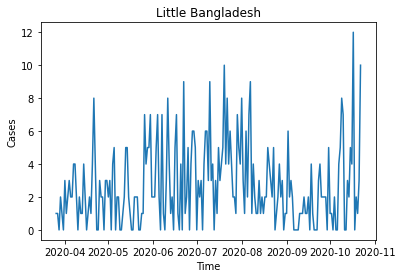

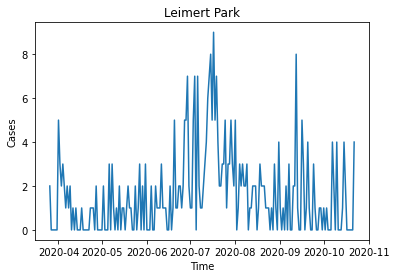

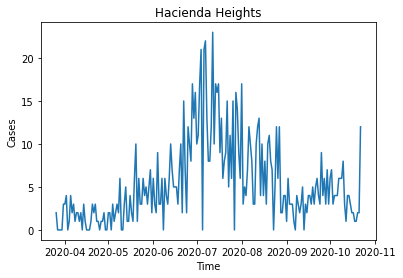

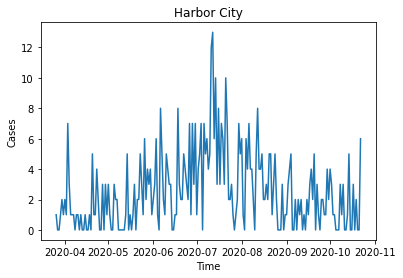

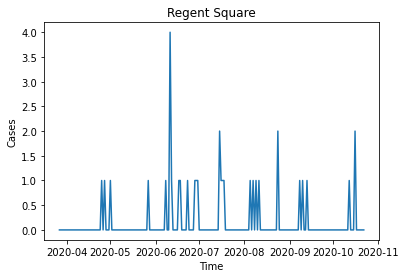

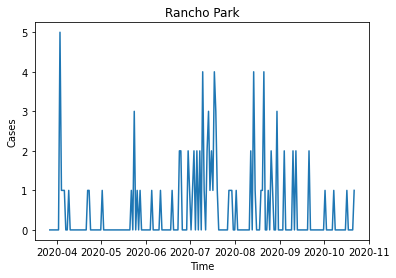

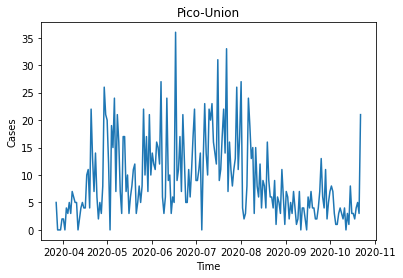

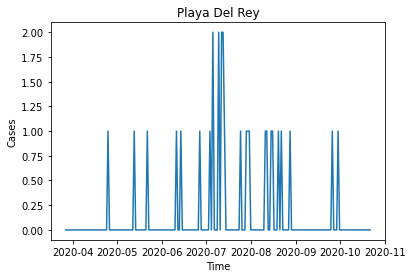

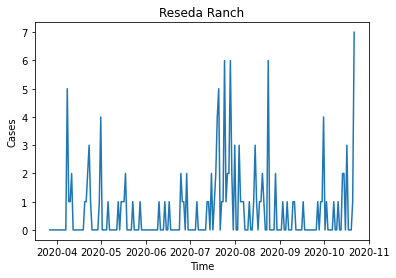

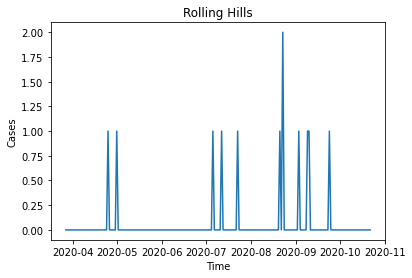

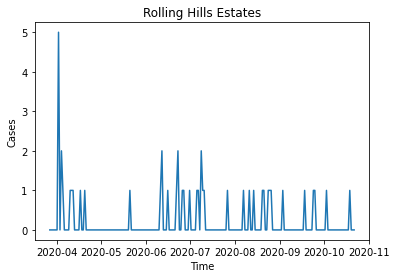

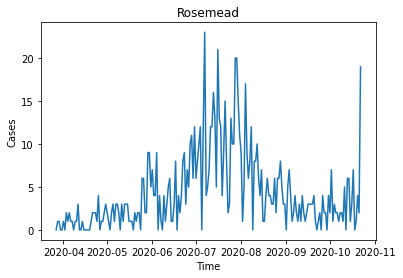

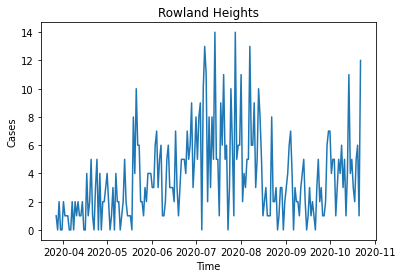

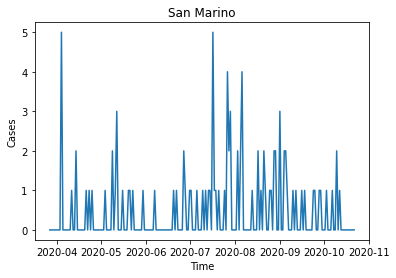

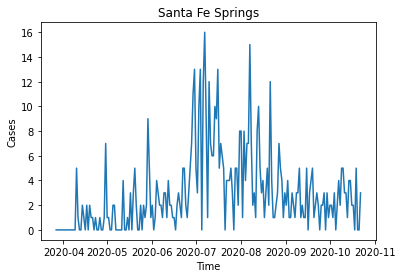

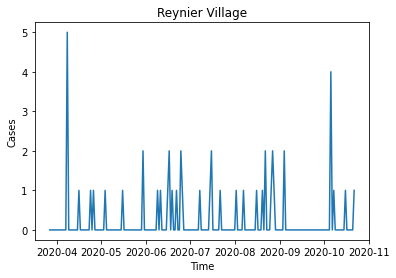

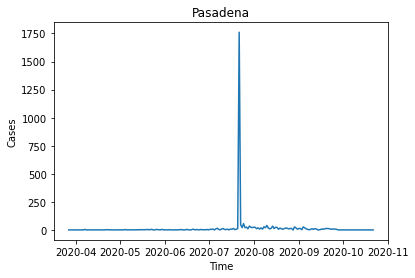

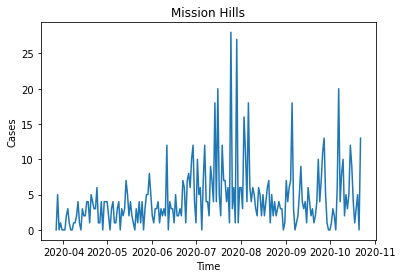

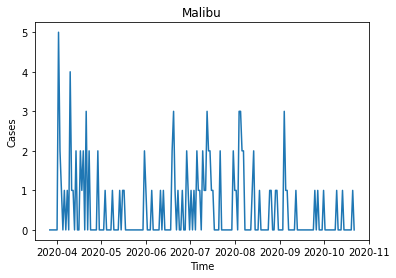

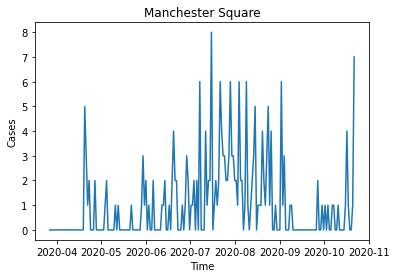

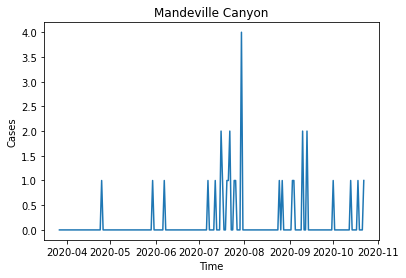

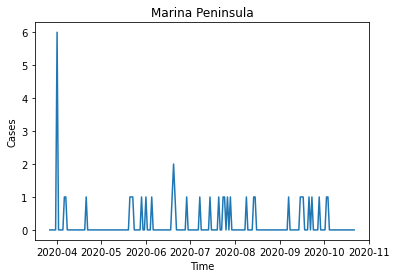

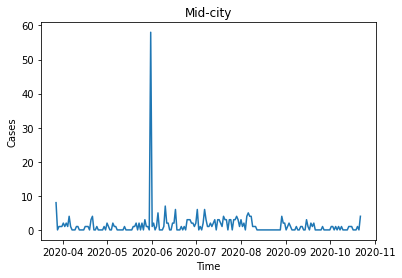

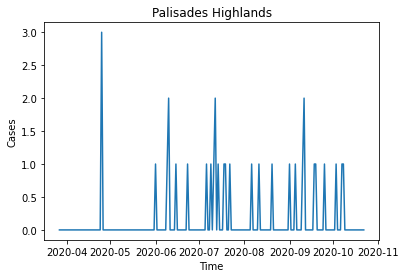

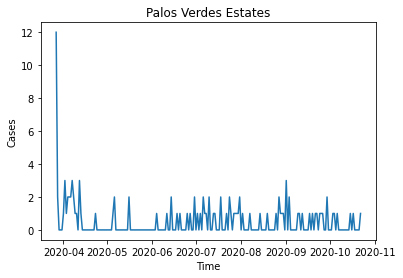

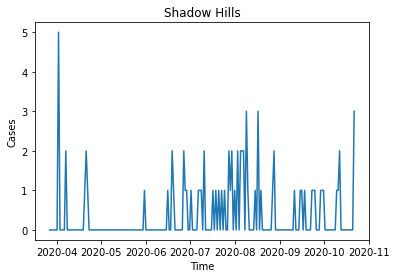

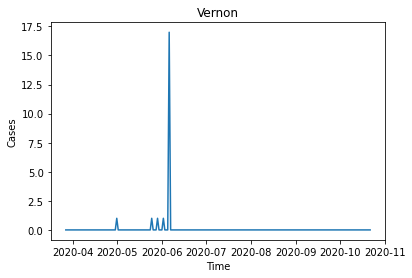

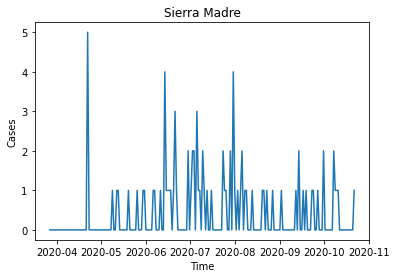

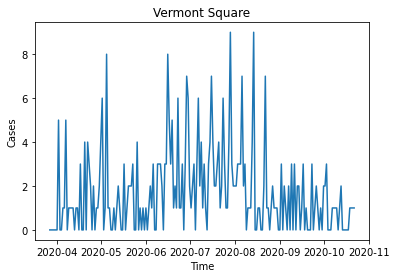

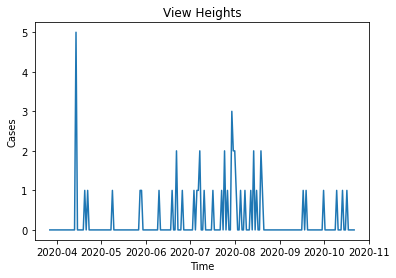

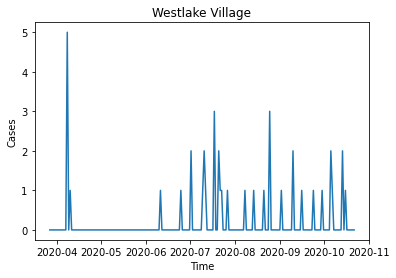

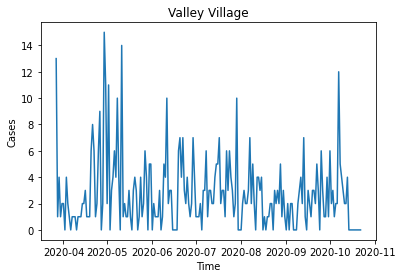

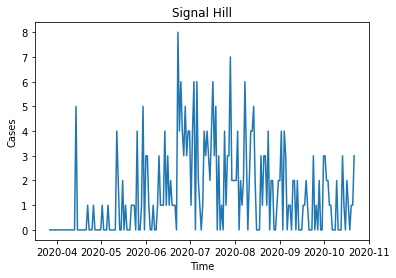

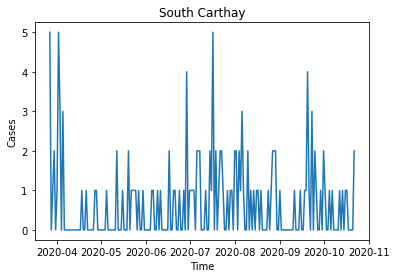

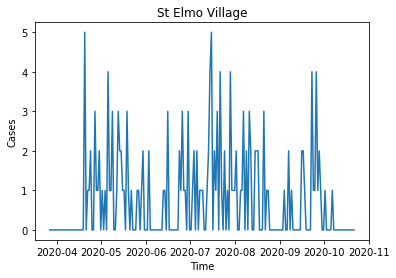

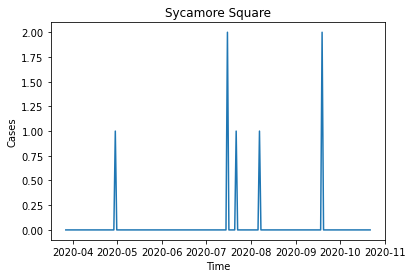

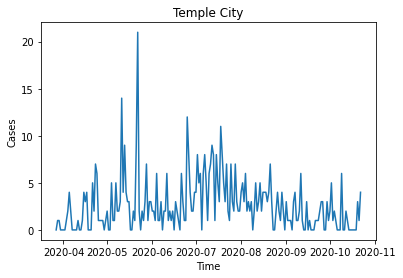

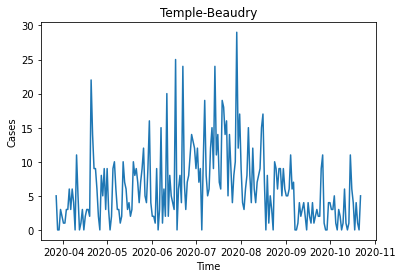

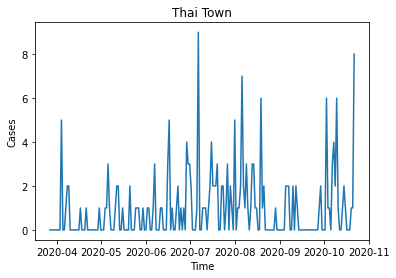

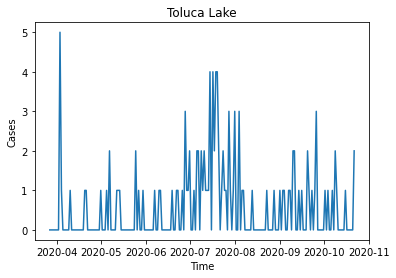

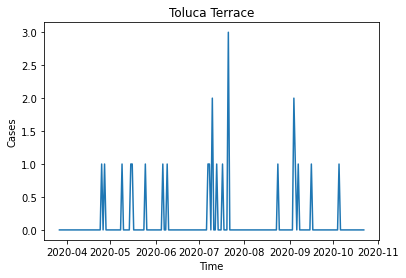

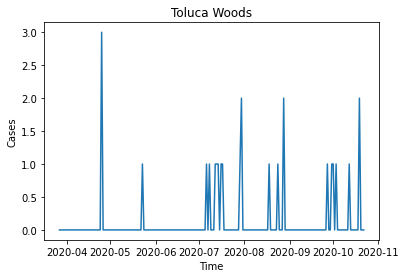

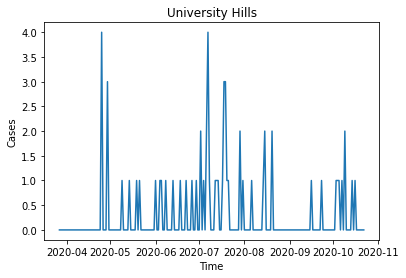

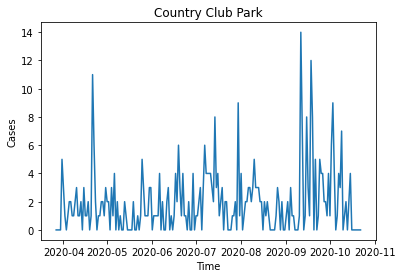

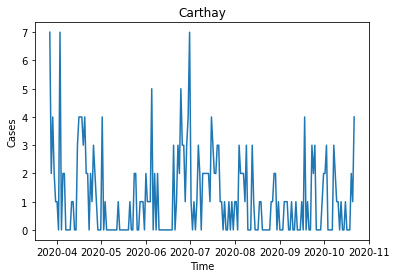

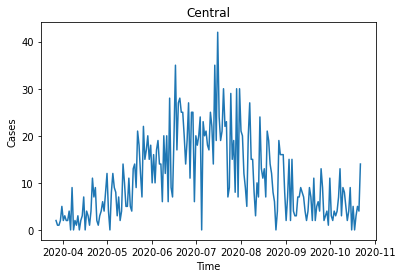

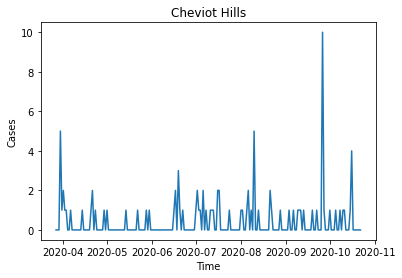

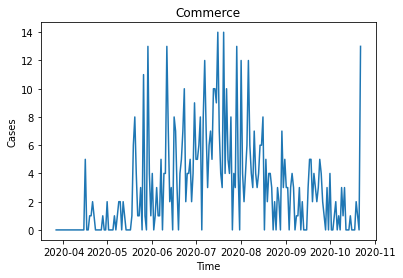

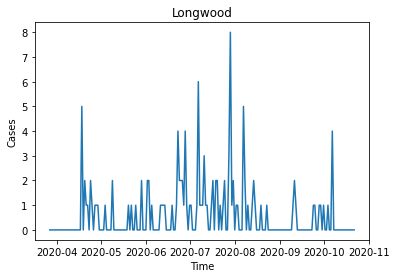

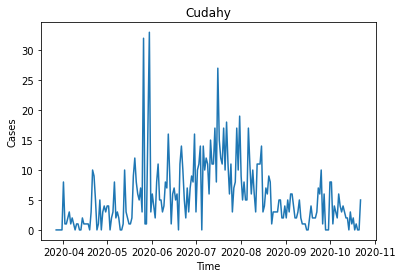

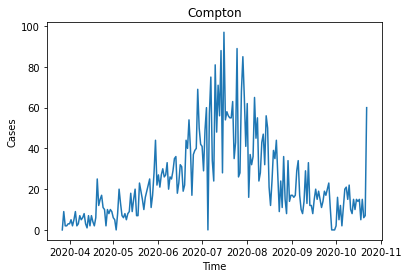

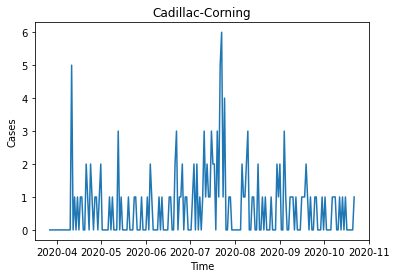

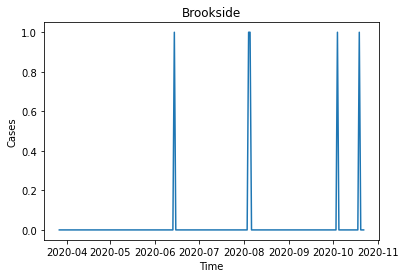

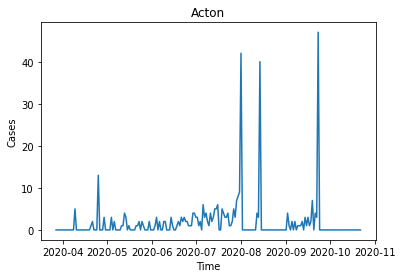

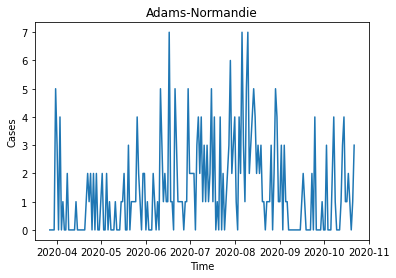

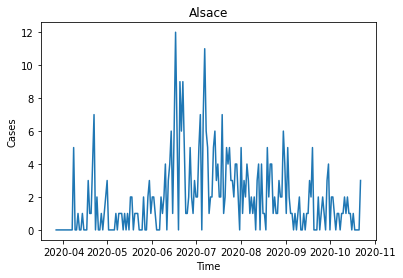

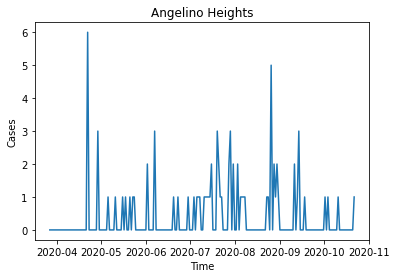

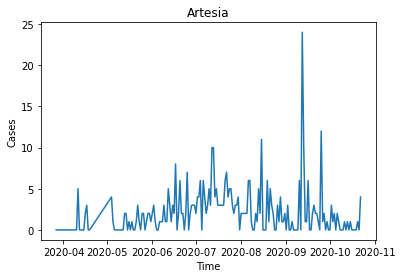

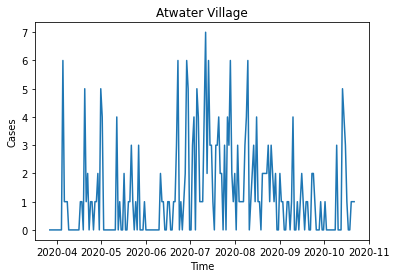

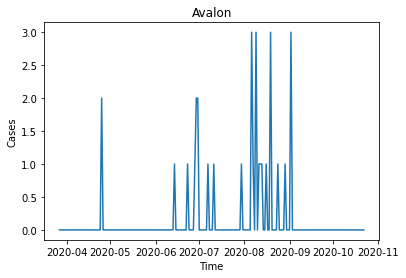

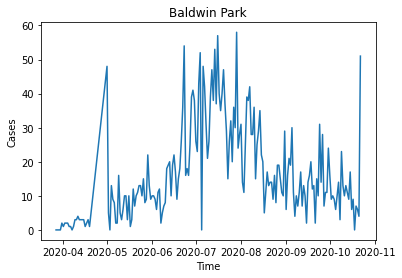

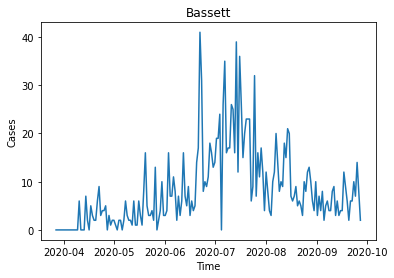

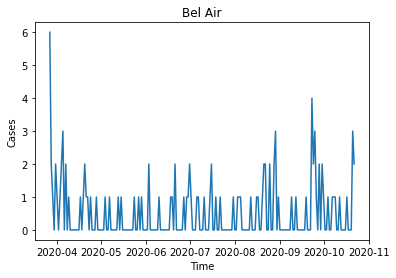

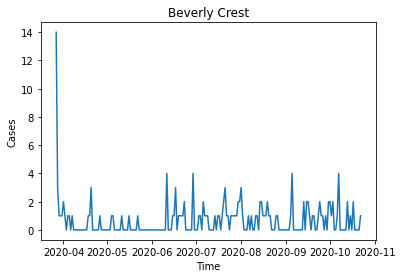

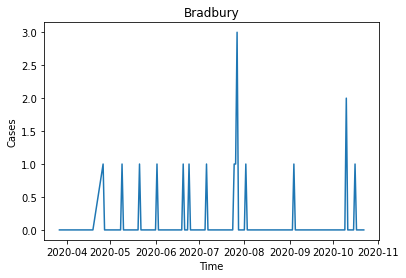

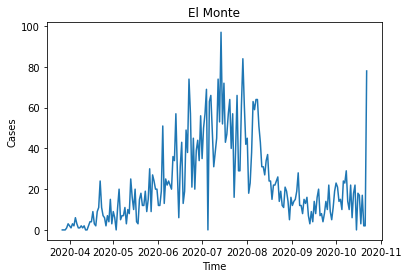

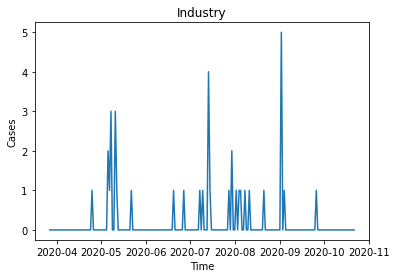

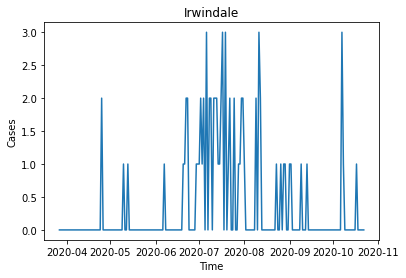

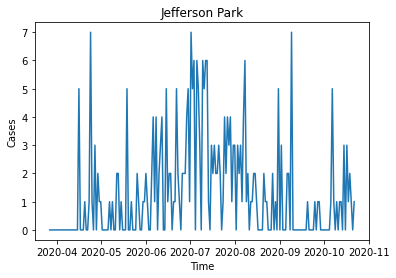

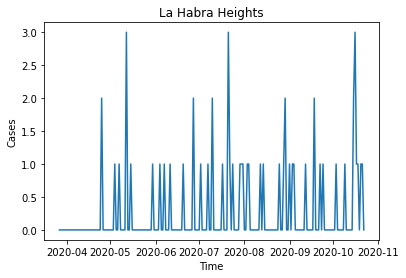

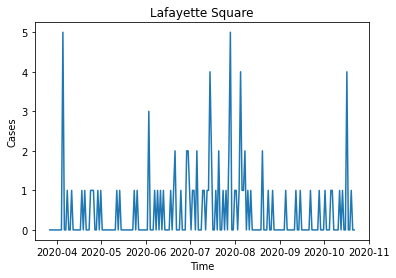

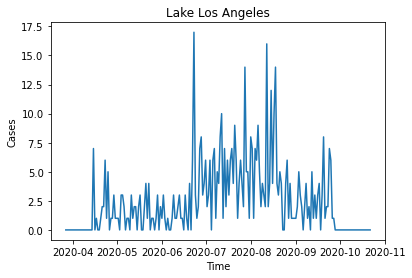

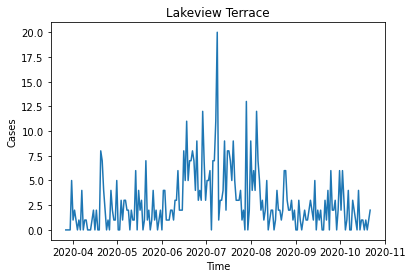

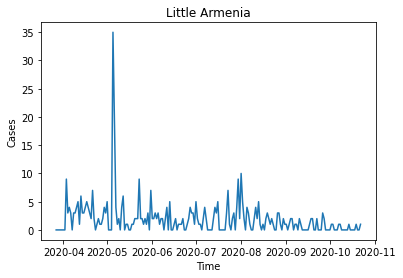

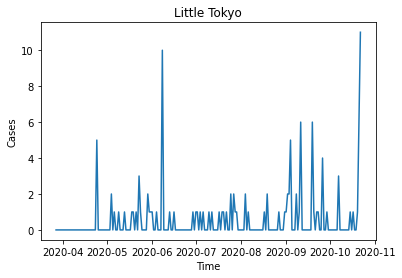

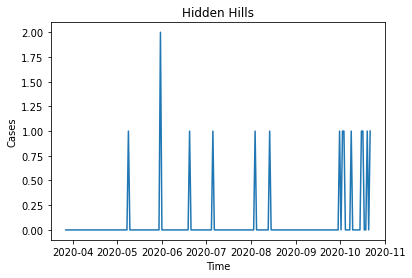

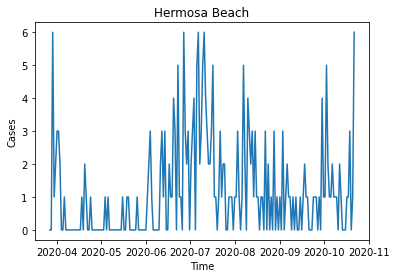

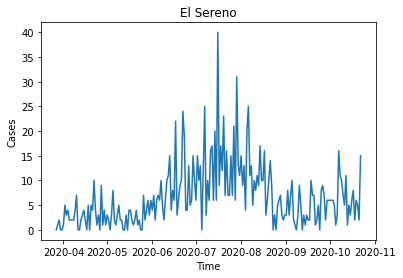

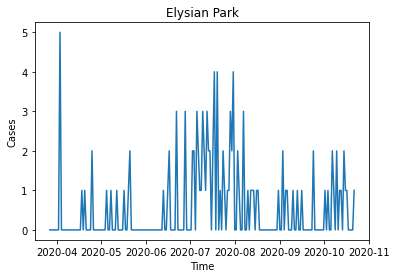

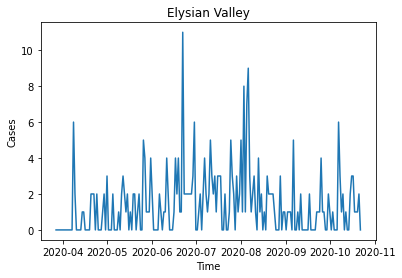

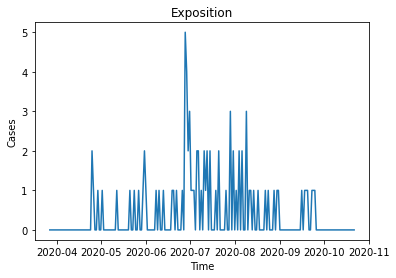

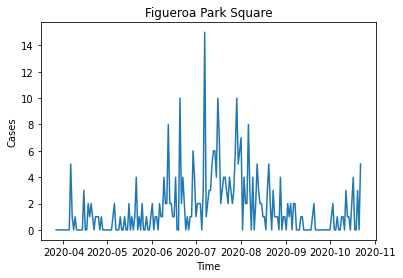

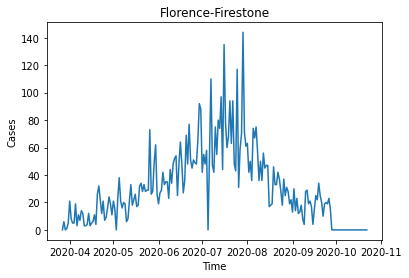

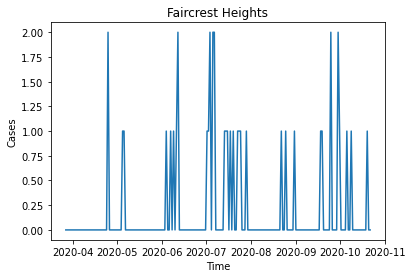

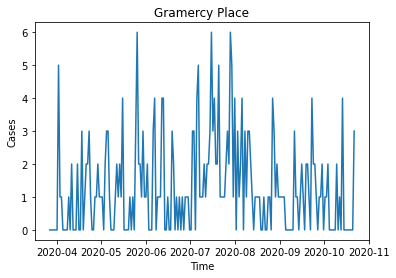

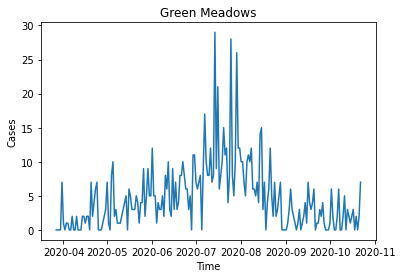

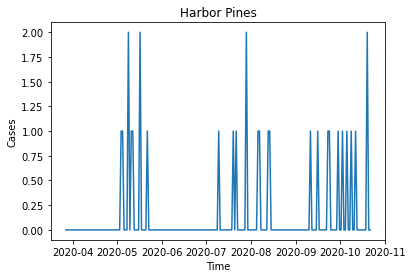

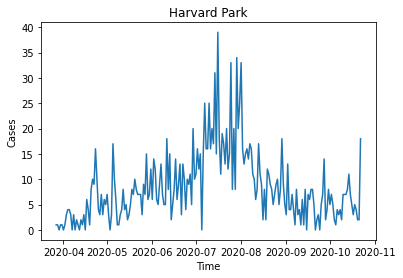

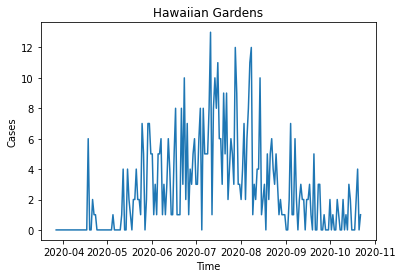

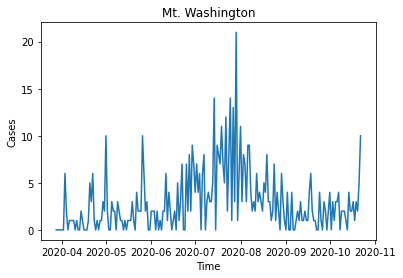

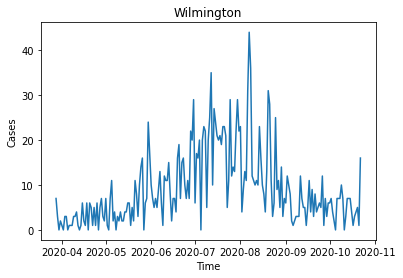

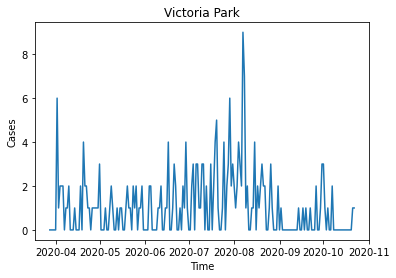

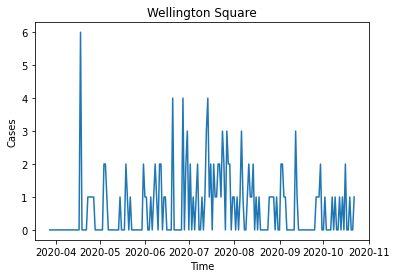

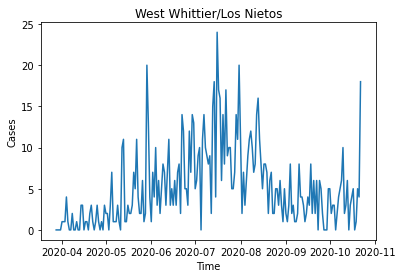

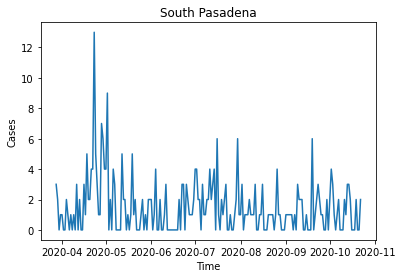

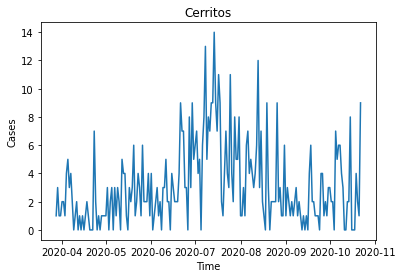

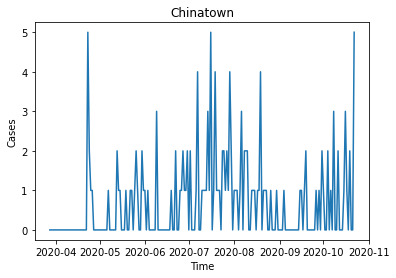

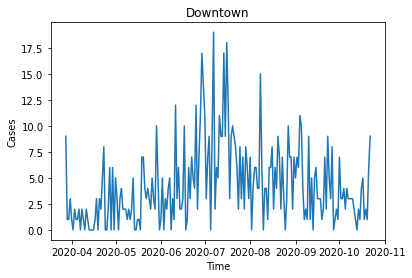

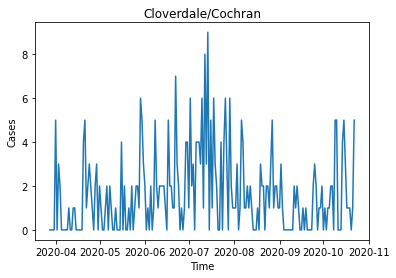

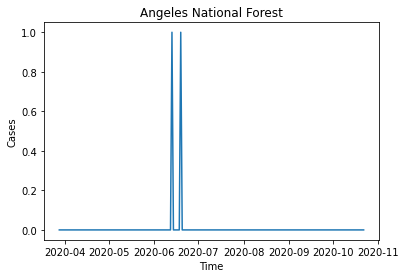

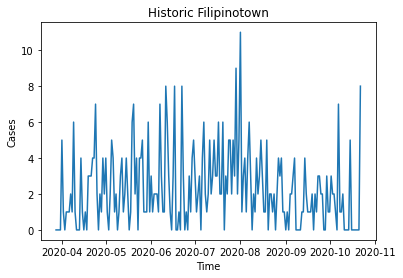

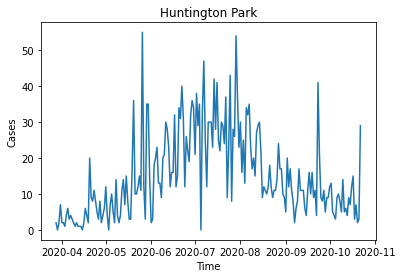

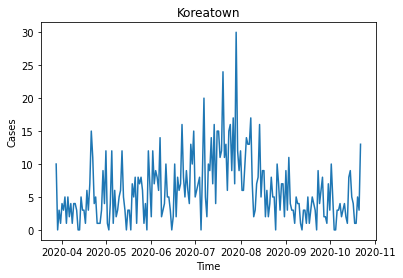

In [53]:
for region in covid_df["Region"].unique():
  df = covid_df[covid_df['Region'] == region]
  times = df['Time']
  cases = df['Number of new cases']
  plt.plot(times, cases)
  plt.title(region)
  plt.xlabel("Time")
  plt.ylabel("Cases")
  plt.show()